In [2]:
%load_ext rpy2.ipython

In [ ]:
%%R
library(dplyr)
IN_DIR <- "../../../..//data/GEO_TCDD_Dose_Response/output/"
gnn_prediction <- read.csv(paste0(IN_DIR, 'predictions.tsv'), sep = "\t", row.names = NULL)
print(dim(gnn_prediction))

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 299  15


In [ ]:
%%R
a = unique(gnn_prediction[,c('target', 'doses')])

colnames(a) <- c('target', 'predicted_dose')
b = merge(gnn_prediction, a, by.x = 'prediction', by.y = 'target')

In [5]:
%%R
b %>% filter(doses == 30 & predicted_dose == 30)

   prediction project_ids sample_ids genders doses target confidence_class_0
1           1   SRP161461 SRR7817618    male    30      1       4.621339e-08
2           1   SRP161461 SRR7817620    male    30      1       5.029484e-05
3           1   SRP161461 SRR7817617    male    30      1       1.575395e-07
4           1   SRP161461 SRR7817630    male    30      1       1.919456e-06
5           1   SRP161461 SRR7817643    male    30      1       6.683698e-03
6           1   SRP161461 SRR7817678    male    30      1       1.785479e-05
7           1   SRP161461 SRR7817633    male    30      1       2.638748e-03
8           1   SRP161461 SRR7817629    male    30      1       2.534663e-07
9           1   SRP161461 SRR7817634    male    30      1       2.867910e-03
10          1   SRP161461 SRR7817658    male    30      1       1.365049e-04
11          1   SRP161461 SRR7817619    male    30      1       1.882053e-05
12          1   SRP161461 SRR7817646    male    30      1       6.166728e-05

37          0.9984099       1.198776e-07       6.282318e-08       3.855514e-10
38          0.7507940       5.129581e-04       1.925622e-03       1.909417e-04
39          0.9999948       5.053732e-08       6.311736e-07       6.088654e-12
40          0.9985170       1.504987e-04       4.577608e-04       3.573206e-09
41          0.7197803       6.005844e-05       1.544012e-05       3.245057e-04
42          0.9987691       1.324022e-05       5.240094e-05       2.264377e-07
43          0.9965371       1.060953e-04       1.532225e-03       6.251749e-08
44          0.9964871       3.811535e-04       1.334647e-04       1.095572e-07
45          0.9999790       1.290520e-07       8.089461e-07       1.996755e-10
46          0.9999635       5.162832e-07       1.110590e-06       7.233986e-11
47          0.9989589       4.510387e-05       5.647666e-05       3.969495e-08
48          0.9857956       1.485811e-03       5.816221e-03       1.320010e-06
49          0.9891994       8.306847e-07       1.443

20             30
21             30
22             30
23             30
24             30
25             30
26             30
27             30
28             30
29             30
30             30
31             30
32             30
33             30
34             30
35             30
36             30
37             30
38             30
39             30
40             30
41             30
42             30
43             30
44             30
45             30
46             30
47             30
48             30
49             30
50             30
51             30
52             30
53             30
54             30
55             30
56             30
57             30
58             30
59             30
60             30
61             30
62             30
63             30
64             30
65             30
66             30
67             30


[1] 299  16
# A tibble: 39 × 3
   doses predicted_dose count
   <dbl>          <dbl> <int>
 1  0              0       57
 2  0              0.01     6
 3  0              0.03     1
 4  0              0.3      1
 5  0              1        3
 6  0.01           0        2
 7  0.01           0.01    10
 8  0.01           0.03     3
 9  0.01           0.1      2
10  0.01           0.3      2
# ℹ 29 more rows
# ℹ Use `print(n = ...)` to see more rows


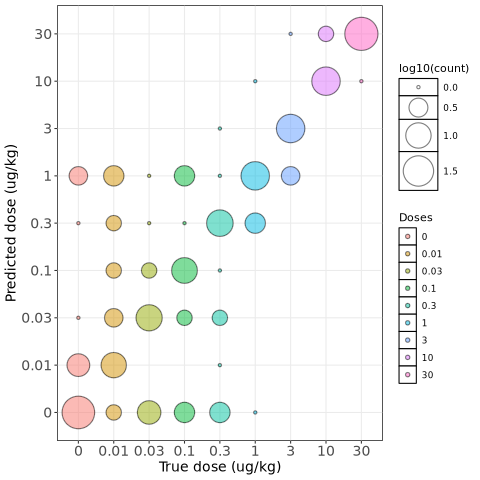

In [ ]:
%%R
library(ggplot2)
combination_counts <- b %>%
  group_by(doses, predicted_dose) %>%
  summarise(count = n(), .groups = 'drop')


p <- ggplot(combination_counts, aes(x = as.factor(doses), y = as.factor(predicted_dose), fill = as.factor(doses), color = as.factor(doses))) +
  geom_point(alpha = 0.5, aes(size=log10(count)), shape = 21, stroke = 0.8, color="black") +  
  labs(x = "True dose (ug/kg)", y = "Predicted dose (ug/kg)", fill = "Doses") +  
  theme_bw()+
  theme(
    panel.background = element_rect(fill = "white", colour = "black"),
    axis.title = element_text(size = 14),  
    axis.text = element_text(size = 14),  
    plot.title = element_blank()  
  )+
  scale_size(range = c(1, 15))  

ggsave("prediction_vs_target_by_dose_without_time_course.pdf", plot = p, width = 10, height = 8)